In [63]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [12]:
#X_train[0]

In [4]:
len(y_train)

60000

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

<Figure size 800x200 with 0 Axes>

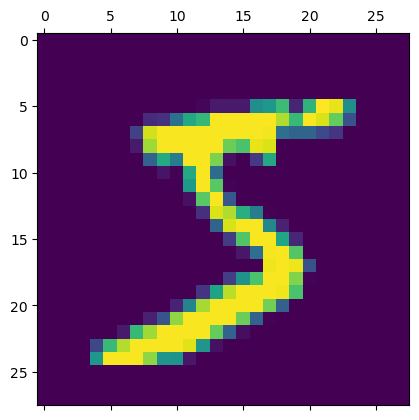

In [24]:
plt.figure(figsize=(8,2))
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

<Figure size 800x200 with 0 Axes>

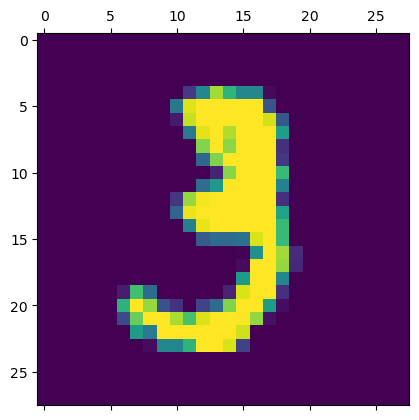

In [25]:
plt.figure(figsize=(8,2))
plt.matshow(X_train[10])

In [21]:
y_train[10]

3

In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
X_train.shape

(60000, 28, 28)

In [45]:
#Scaling the data
X_train= X_train / 255
X_test= X_test / 255

In [46]:
# Converting the data to ine dimensional array
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened= X_test.reshape(len(X_test),28*28)

In [47]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

# Using only input layer and output layer without hidden layer

In [48]:
#Building the model

ann= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

ann.fit(X_train_flattened, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4700 - accuracy: 0.8783


In [49]:
#Building the model

ann= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

ann.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4664 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9252


In [50]:
ann.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.9255


[0.26475653052330017, 0.9254999756813049]

In [57]:
y_pred= ann.predict(X_test_flattened)
y_pred[3]

313/313 [==============================] - 0s 1ms/step


array([9.9947488e-01, 2.1560583e-08, 5.1604528e-02, 5.4402142e-03,
       5.1814470e-05, 7.4932635e-02, 6.7715190e-02, 1.3232439e-02,
       3.5490155e-02, 1.9755917e-02], dtype=float32)

In [55]:
np.argmax(y_pred[3])

0

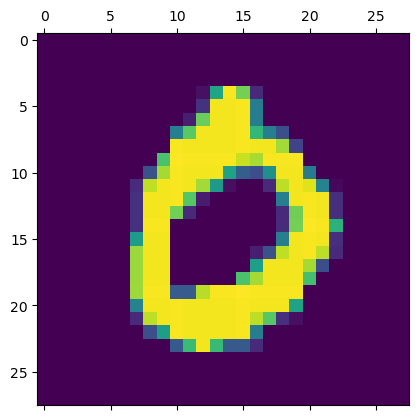

In [58]:
plt.matshow(X_test[3])

In [56]:
np.argmax(y_pred[0])

7

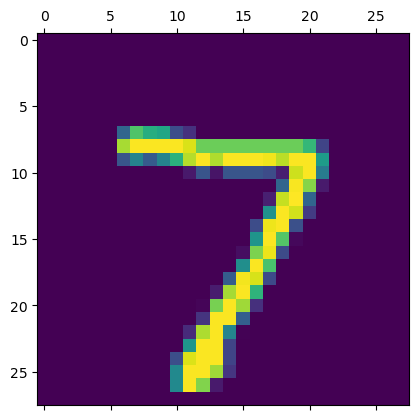

In [60]:
plt.matshow(X_test[0])

In [61]:
y_pred_labels= [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [62]:
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    5,    2,    3,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    9,  917,   18,   11,    3,   11,   11,   40,    4],
       [   2,    0,   18,  931,    0,   18,    2,   11,   19,    9],
       [   2,    1,    3,    1,  915,    0,   10,    4,   10,   36],
       [  11,    3,    3,   38,   11,  763,   16,    7,   33,    7],
       [  13,    3,    7,    1,    8,   11,  910,    2,    3,    0],
       [   1,    5,   22,    6,    6,    0,    0,  947,    3,   38],
       [   5,    9,    5,   24,    9,   19,    9,   11,  876,    7],
       [  10,    7,    1,   11,   23,    5,    0,   22,   10,  920]])>

Text(50.722222222222214, 0.5, 'Truth')

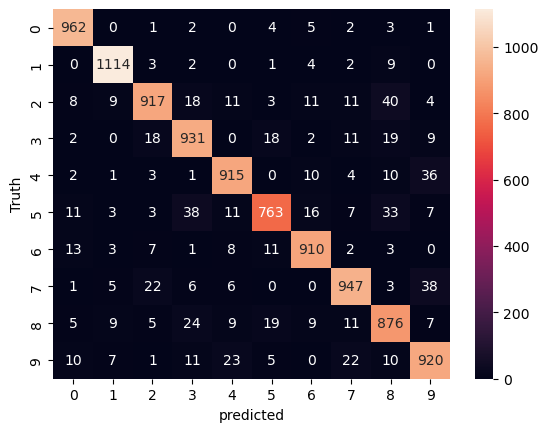

In [64]:
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [65]:
#Using 600 neuron in hidden layer
model = keras.Sequential([
    keras.layers.Dense(600, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1966 - accuracy: 0.9420
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0787 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0513 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0347 - accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0258 - accuracy: 0.9916


In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9805


[0.0754646509885788, 0.9804999828338623]

313/313 [==============================] - 1s 2ms/step


Text(50.722222222222214, 0.5, 'Truth')

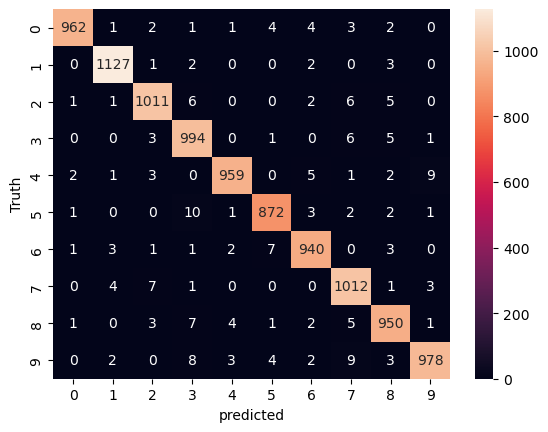

In [69]:
y_pred600= model.predict(X_test_flattened)
y_pred_600= [np.argmax(i) for i in y_pred600]

cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred_600)
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [67]:
#Using 100 neuron in hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1259 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0867 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0655 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0510 - accuracy: 0.9847


In [68]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9765


[0.07715258747339249, 0.9764999747276306]

In [72]:
# flattening directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1939 - accuracy: 0.9421
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0792 - accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0506 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0254 - accuracy: 0.9921


In [ ]:
model.evaluate(X_test, y_test)

In [73]:
# flattening directly
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1956 - accuracy: 0.9421
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0777 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0515 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0357 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l